In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [33]:
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [34]:
X = breast_dataset.iloc[:,:30].values 
Y = breast_dataset.iloc[:, 30].values 

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
std_X = sc_X.fit_transform(X)

In [45]:
# Problem 1
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(std_X, Y, test_size = 0.20, train_size = 0.80, random_state = np.random)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

In [48]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9912280701754386
Precision: 0.9864864864864865
Recall: 1.0


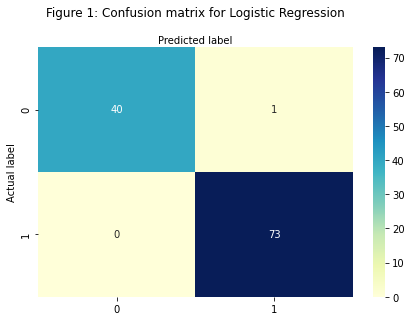

In [49]:
# Confusion matrix
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 1: Logistic Regression Confusion matrix ', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');

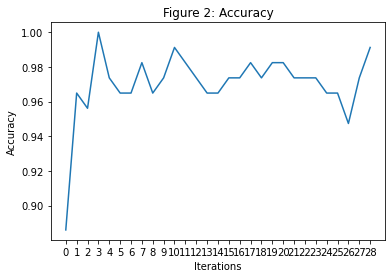

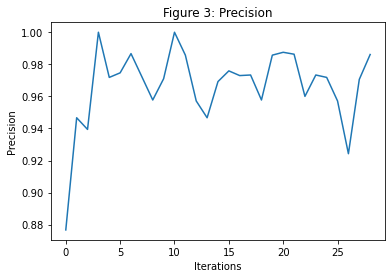

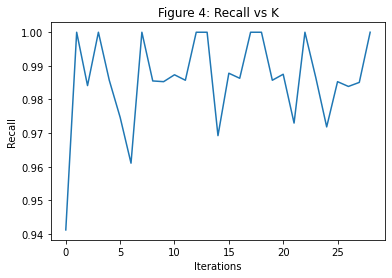

In [57]:
accuracy = []
precision = []
recall = []

from sklearn.decomposition import PCA
for i in range(29):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std_X)
    principalDf = pd.DataFrame(data = principalComponents)

    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.20,train_size = 0.80, random_state = np.random)
    classifier = classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    precision.append(metrics.precision_score(Y_test, Y_pred))
    recall.append(metrics.recall_score(Y_test, Y_pred))

# Plots
plt.figure()
plt.plot(range(29),accuracy)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Figure 2: Accuracy')
plt.xticks(range(29))
plt.show()

plt.figure()
plt.plot(range(29),precision)
plt.xlabel('Iterations')
plt.ylabel('Precision')
plt.title('Figure 3: Precision')
plt.show()

plt.figure()
plt.plot(range(29),recall)
plt.xlabel('Iterations')
plt.ylabel('Recall')
plt.title('Figure 4: Recall vs K')
plt.show()

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
lda_t = lda.fit_transform(X,Y)

X_train, X_test, Y_train, Y_test = train_test_split(lda_t, Y, test_size = 0.20,train_size = 0.80, random_state = np.random)
lda.fit(X_train,Y_train)

Y_pred = lda.predict(X_test)

cnf_matrix = confusion_matrix(Y_test, Y_pred) 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9736842105263158
Precision: 0.9577464788732394
Recall: 1.0


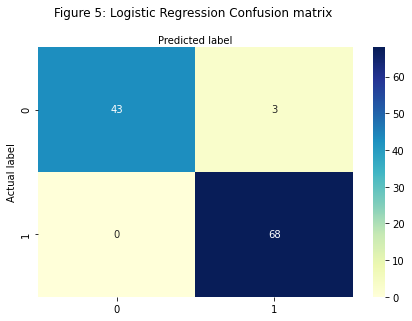

In [54]:
# Confusion matrix
class_names=[0,1]  
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 5: Logistic Regression Confusion matrix ', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');